# Assessment: Detección de Anomalías en Series de Tiempo

 

### Descripción

La posición trabajará con datos de diagnósticos de distintos dispositivos para la detección de anomalías de los mismos. Por lo tanto, el análisis de series de tiempo es una herramienta muy útil.

 

### Objetivo

Con los datos dados, generar un modelo/método de detección de anomalías para Series de Tiempo. El tipo del modelo o modelos es a tu elección. Adicionalmente, incluir procesos de preprocesamiento de datos en caso de ser utilizados y mostrar métricas usadas para medir desempeño y/o justificación del modelo.

El desarrollo del modelo es libre, al igual que el formato con el que quieras presentar los resultados; sin embargo, se tomará en cuenta la lógica del proceso realizado. Finalmente, puedes hacer mas de un modelo si sientes que ello podría ayudar en la justificación o en comparaciones de desempeño, pero no es requisito y no afectará negativamente tu assessment.

 

### Dataset

Los datos adjuntos representan una serie de tiempo de cierto KPI ficticio. Se incluye, además, una columna 'label' donde se etiqueta cada fila como anómalo (1) o no anómalo (0), en caso en que se realice un modelo supervisado. El dataset se adjuntará en este mismo correo. 

# 1. Exploración y procesamiento de datos

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_original = pd.read_csv('data_kpi.csv')
df=df_original
df_original

,timestamp,value,label,KPI ID
0,1469203200,-0.201017,0,a8c06b47-cc41-3738-9110-12df0ee4c721
1,1469203500,-0.283928,0,a8c06b47-cc41-3738-9110-12df0ee4c721
2,1469203800,-0.105569,0,a8c06b47-cc41-3738-9110-12df0ee4c721
3,1469204100,-0.614691,0,a8c06b47-cc41-3738-9110-12df0ee4c721
4,1469204400,-0.746266,0,a8c06b47-cc41-3738-9110-12df0ee4c721
...,...,...,...,...
8858,1471880100,-0.296199,0,a8c06b47-cc41-3738-9110-12df0ee4c721
8859,1471880400,-0.080123,0,a8c06b47-cc41-3738-9110-12df0ee4c721
8860,1471880700,0.061144,0,a8c06b47-cc41-3738-9110-12df0ee4c721
8861,1471881000,0.450105,0,a8c06b47-cc41-3738-9110-12df0ee4c721


## 1.1 Análisis de dependencia

In [7]:
df=df_original
df['fecha'] = pd.to_datetime(df['timestamp'], unit='s')
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.dayofweek
df['hora'] = df['fecha'].dt.hour
df

,timestamp,value,label,KPI ID,fecha,mes,dia_semana,hora
0,1469203200,-0.201017,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-07-22 16:00:00,7,4,16
1,1469203500,-0.283928,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-07-22 16:05:00,7,4,16
2,1469203800,-0.105569,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-07-22 16:10:00,7,4,16
3,1469204100,-0.614691,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-07-22 16:15:00,7,4,16
4,1469204400,-0.746266,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-07-22 16:20:00,7,4,16
...,...,...,...,...,...,...,...,...
8858,1471880100,-0.296199,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-08-22 15:35:00,8,0,15
8859,1471880400,-0.080123,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-08-22 15:40:00,8,0,15
8860,1471880700,0.061144,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-08-22 15:45:00,8,0,15
8861,1471881000,0.450105,0,a8c06b47-cc41-3738-9110-12df0ee4c721,2016-08-22 15:50:00,8,0,15


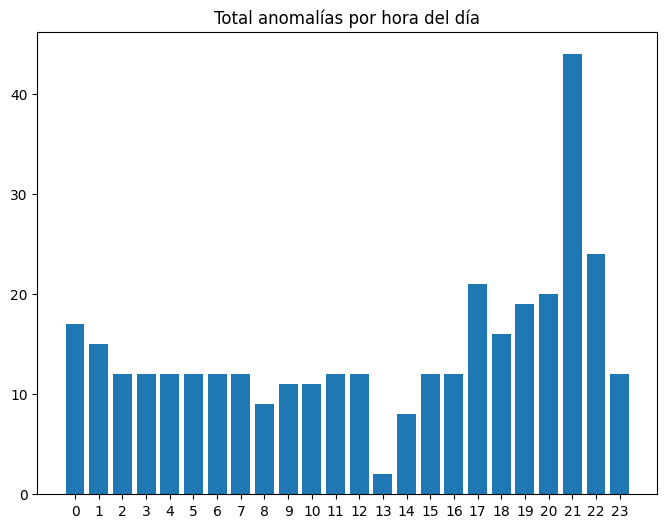

In [8]:

df_ = df.groupby('hora')['label'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(df_['hora'], df_['label'])
plt.title('Total anomalías por hora del día')
plt.xticks(df_['hora'])
plt.show()


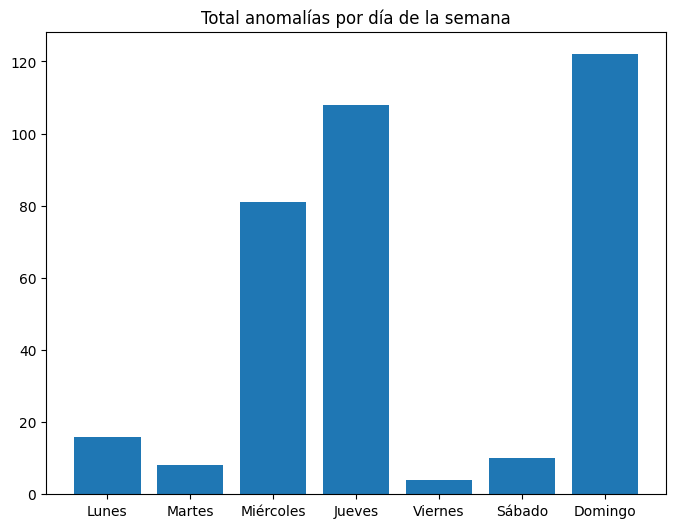

In [9]:
df_ = df.groupby('dia_semana')['label'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(df_['dia_semana'], df_['label'])
plt.title('Total anomalías por día de la semana')

dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.xticks(df_['dia_semana'], dias_semana)
plt.show()


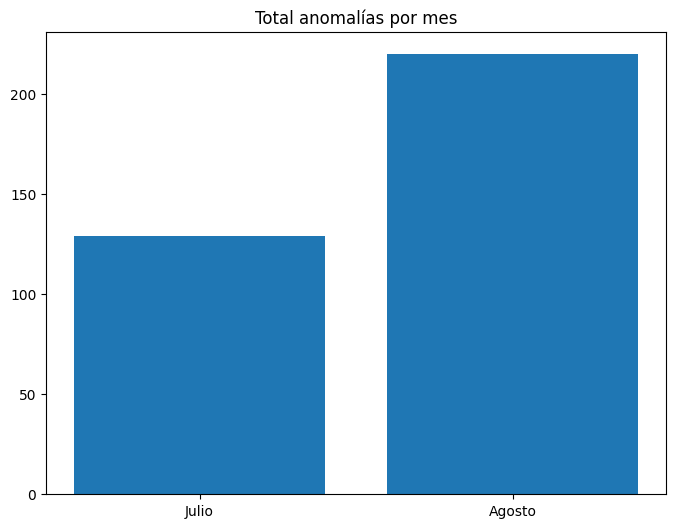

In [10]:
df_ = df.groupby('mes')['label'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(df_['mes'], df_['label'])
plt.title('Total anomalías por mes')
dias_semana = ['Julio', 'Agosto']
plt.xticks(df_['mes'], dias_semana)
plt.show()


Podemos ver gráficamnte que la cantidad de anomalías depende del mes, del día de la semana y de la hora. Conforme cambian estos parámetros, la cantidad de anomalías también varía. No consideramos el año, porque solamente trabajamos con 2016. Entrenaremos el modelo con estas variables para medir su rendimiento para ver si es posible predecir las anomalías. En dado caso que no tengamos un buen rendimiento, consideraré elegir otros parámetros para elegir los que den un mejor resultado.

## 1.2 Proceso de datos

In [11]:
df=pd.read_csv('data_kpi.csv')

df['fecha'] = pd.to_datetime(df['timestamp'], unit='s')
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.dayofweek
df['hora'] = df['fecha'].dt.hour

df = pd.get_dummies(df, columns=['mes'], prefix='mes', dtype=int)
df = pd.get_dummies(df, columns=['dia_semana'], prefix='dia', dtype=int)
df = pd.get_dummies(df, columns=['hora'], prefix='hora', dtype=int)
df = df.drop(['timestamp', 'KPI ID', 'fecha'], axis=1)



columna_label = df['label']
df = df.drop('label', axis=1)
df['label'] = columna_label
df_pre=df
#df=df_pre.loc[df_pre['label'] == 1]
df


,value,mes_7,mes_8,dia_0,dia_1,dia_2,dia_3,dia_4,dia_5,dia_6,...,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23,label
0,-0.201017,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,-0.283928,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-0.105569,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-0.614691,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-0.746266,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,-0.296199,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8859,-0.080123,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8860,0.061144,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8861,0.450105,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Como nuestras variables 'mes', 'dia_semana' y 'hora' son variables cualitativas las convertimos a variables binarias para que nuestro algoritmo pueda entrenarse de forma adecuada. Si dejáramos el valor cualitativo, el algoritmo podría tomarlo como un valor cuantitativo y entrenarse incorrectamente

## 1.3 Balanceo de datos

In [12]:
df['label'].value_counts()

label
0    8514
1     349
Name: count, dtype: int64

Como vemos nuestros datos se encuentran desbalanceados, una cantidad considerablemente mayor en label = 0. Los algoritmos de aprendizaje automático tienden a favorecer la clase mayoritaria, ya que hay más ejemplos de esa clase para aprender. Esto nos puede llevar a un sesgo en el modelo, lo que significa que el modelo puede tener un rendimiento deficiente en la clasificación de la clase minoritaria, que es la que buscamos predecir. Por lo que consideré crear datos sintéticos para emparejar las clases y corregir esa posible limitante. Usé la función SMOTE aque ajusta automáticamente la proporción de la clase minoritaria y la clase mayoritaria creando datos sintéticos. Como vemos a continuación tenemos la misma cantidad de datos en ambas clases.

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X = df.drop('label', axis=1)
y = df['label']

X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

df_resampled['label'].value_counts()

label
0    8514
1    8514
Name: count, dtype: int64

# 2. Machine Learning

## 2.1 Antes del balanceo de datos

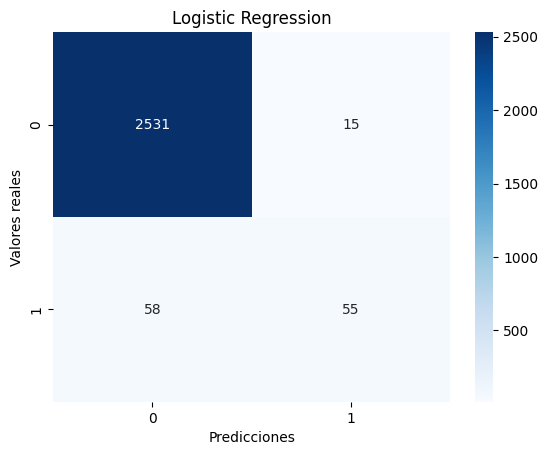

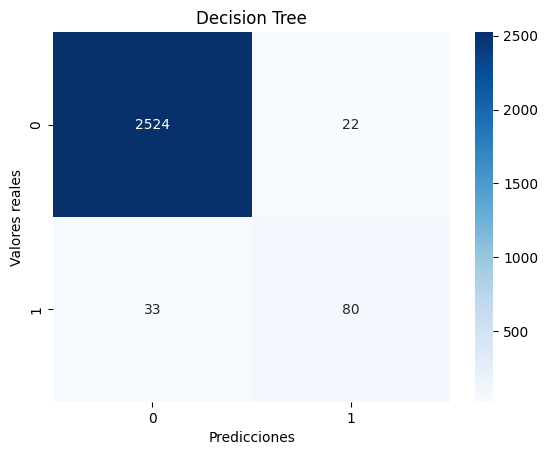

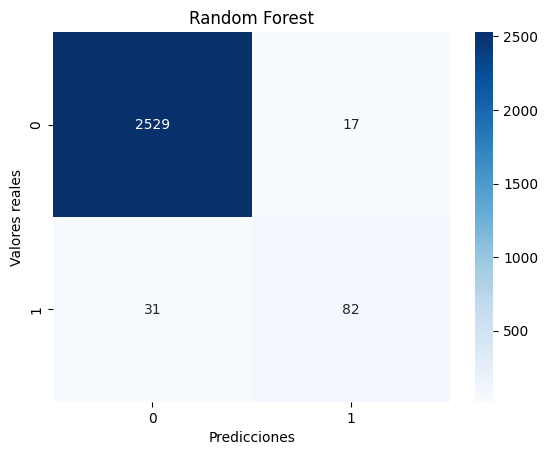

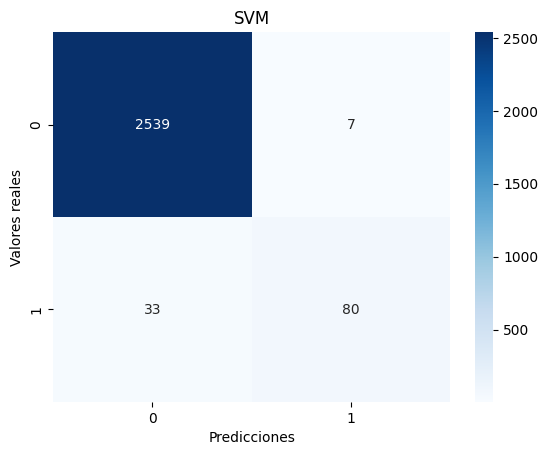

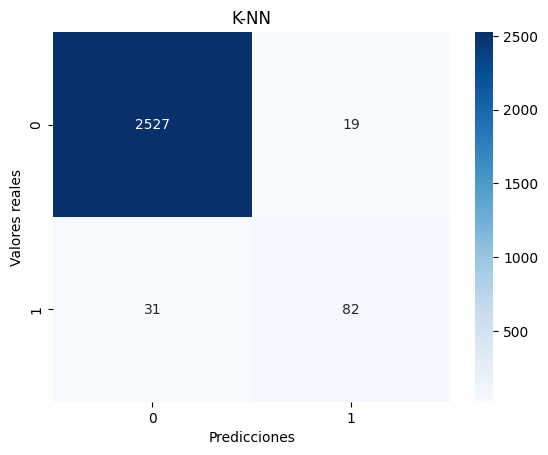

,Algoritmo,Exactitud,Precisión,Recall,F1 Score
0,Logistic Regression,0.972546,0.785714,0.486726,0.601093
1,Decision Tree,0.979316,0.784314,0.707965,0.744186
2,Random Forest,0.981948,0.828283,0.725664,0.773585
3,SVM,0.984957,0.919540,0.707965,0.800000
4,K-NN,0.981196,0.811881,0.725664,0.766355


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X = df.iloc[:, :-1] 
y = df.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier()
}


results = []

for name, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, precision, recall, f1])
    # Calcular la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor (heatmap) de la matriz de confusión
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.title(name)

# Agregar etiquetas a los ejes
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.show()


results_df = pd.DataFrame(results, columns=['Algoritmo', 'Exactitud', 'Precisión', 'Recall', 'F1 Score'])

results_df


Vemos que antes del balanceo de datos, a pesar de tener accuracy muy alto, eso no significa que el modelo sea eficiente. Como el modelo tiene muchos valores de la clase '0', será bueno para predecir esta categoría. Pero para la que nos interesa de los Verdaderos Positivos y Falsos Negativos no será tan eficiente el modelo. Podemos ver que el valor de Recall sale bajo en los modelos. El Recall es especialmente importante en situaciones en las que identificar todos los casos positivos es importante y los falsos negativos pueden representar un problema.

## 2.2 Después del balanceo de datos

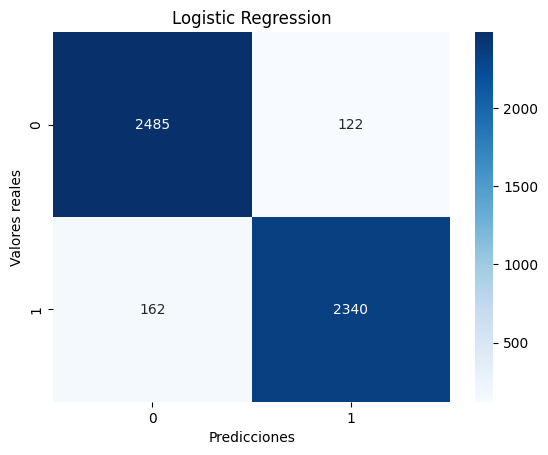

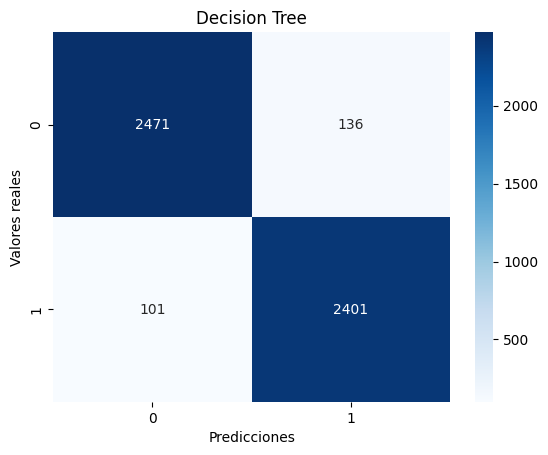

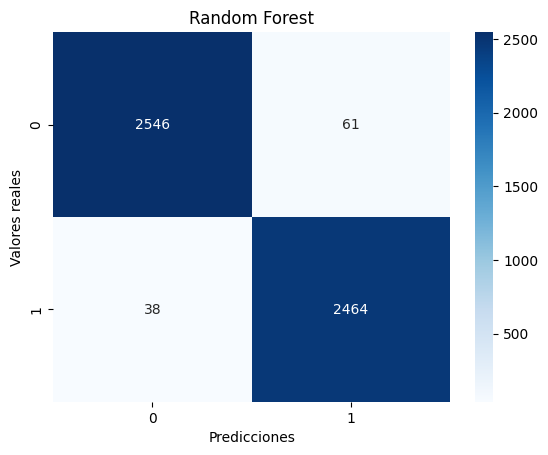

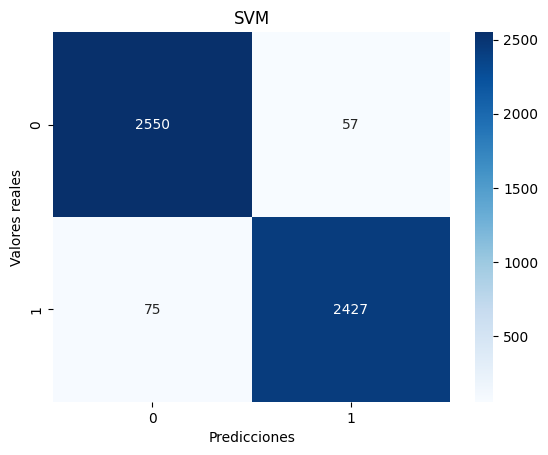

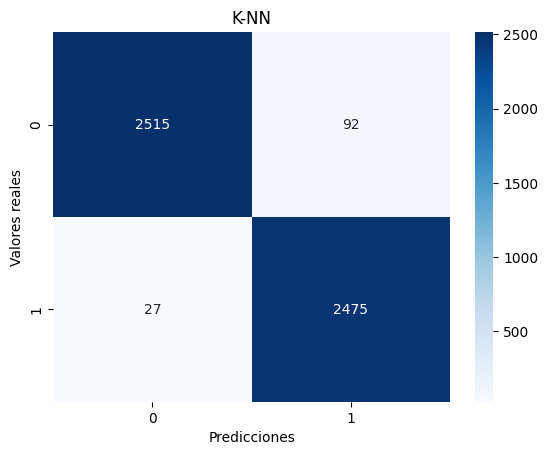

,Algoritmo,Exactitud,Precisión,Recall,F1 Score
0,Logistic Regression,0.944412,0.950447,0.935252,0.942788
1,Decision Tree,0.953611,0.946393,0.959632,0.952967
2,Random Forest,0.980622,0.975842,0.984812,0.980306
3,SVM,0.974163,0.977053,0.970024,0.973526
4,K-NN,0.976708,0.964160,0.989209,0.976524


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df=df_resampled
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-NN': KNeighborsClassifier()
}


results = []

for name, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([name, accuracy, precision, recall, f1])
    # Calcular la matriz de confusión
    confusion = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor (heatmap) de la matriz de confusión
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
    plt.title(name)

# Agregar etiquetas a los ejes
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.show()


results_df = pd.DataFrame(results, columns=['Algoritmo', 'Exactitud', 'Precisión', 'Recall', 'F1 Score'])

results_df


Con el balanceo de datos, el modelo que tuvo el mejor rendimiento en este caso fue el de K-nearest neighbors (K-NN), con un Recall de 98.92%, porcentaje que podemos considerar aceptable para este modelo. Vemos que de las 2502 predicciones de los valores con anomalías, predijo 2475 correctamente (98.92%). Hice varios cambios en 'test_size' y la cantidad de vecinos en 'K-NN' para ver si se podía aumentar el Recall, pero no variaba mucho, por lo que decidí continuar con las predicciones.

In [17]:
df_filtrado = df_pre.loc[df_pre['label'] == 1]
df_filtrado= df_filtrado.drop('label', axis=1)
df_filtrado

,value,mes_7,mes_8,dia_0,dia_1,dia_2,dia_3,dia_4,dia_5,dia_6,...,hora_14,hora_15,hora_16,hora_17,hora_18,hora_19,hora_20,hora_21,hora_22,hora_23
108,-0.067960,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
109,6.569068,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
110,-0.110529,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
351,-1.582304,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
352,19.466350,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,-1.425315,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7519,0.679378,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7520,0.602050,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7521,4.803761,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
df_original = pd.read_csv('data_kpi.csv')
df_filtrado2 = df_original.loc[df_original['label'] == 1]
df_filtrado2

,timestamp,value,label,KPI ID
108,1469235600,-0.067960,1,a8c06b47-cc41-3738-9110-12df0ee4c721
109,1469235900,6.569068,1,a8c06b47-cc41-3738-9110-12df0ee4c721
110,1469236200,-0.110529,1,a8c06b47-cc41-3738-9110-12df0ee4c721
351,1469308800,-1.582304,1,a8c06b47-cc41-3738-9110-12df0ee4c721
352,1469309100,19.466350,1,a8c06b47-cc41-3738-9110-12df0ee4c721
...,...,...,...,...
7518,1471472700,-1.425315,1,a8c06b47-cc41-3738-9110-12df0ee4c721
7519,1471473000,0.679378,1,a8c06b47-cc41-3738-9110-12df0ee4c721
7520,1471473300,0.602050,1,a8c06b47-cc41-3738-9110-12df0ee4c721
7521,1471473600,4.803761,1,a8c06b47-cc41-3738-9110-12df0ee4c721


In [19]:
df=df_resampled
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
algoritmo=KNeighborsClassifier()
algoritmo.fit(X_train, y_train)

algoritmo.predict(df_filtrado)



array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

En este apartado tomé todos los valores en los que el valor de "label" era 1, y tomé las variables predictoras para obtener el valor de label con el algoritmo elegido (K-NN). En los resultados, se buscaba que todos fueran 1, pero como tiene un recall de 98.92%, hay algunos valores que no se predijeron correctamente, que son lo que aparecen en 0. Pero en general funciona como se esperaba. 

## 2.3 Predicción de valores en consola

Aquí se realizaron algunas pruebas desde la consola eligiendo valores aleatorios y todos los escogidos los predijo correctamente.

In [46]:


def obtener_label(timestamp, value):

    columnas =df_filtrado.columns
    data = [[0] * len(columnas)]
    df = pd.DataFrame(data, columns=columnas)
        
    M = pd.DataFrame( [[int(timestamp)]], columns=['fecha'])
    M['fecha']= pd.to_datetime(M['fecha'], unit='s')
    M['dia_semana'] = M['fecha'].dt.dayofweek
    M['mes'] = M['fecha'].dt.month
    M['hora'] = M['fecha'].dt.hour

    dia_=M['dia_semana']
    dia_=dia_[0]
    mes_=M['mes']
    mes_=mes_[0]
    hora_=M['hora']
    hora_=hora_[0]
    
    dia_sem='dia_'+str(dia_)
    mes='mes_'+str(mes_)
    hora='hora_'+str(hora_)
    df['value']=float(value)
    df[dia_sem]=1
    df[mes]=1
    df[hora]=1

    prediccion=algoritmo.predict(df)

    if prediccion[0] == 0:
        resp="No hay anomalía"
    else:
        resp="Hay anomalía"

    return resp

llave=True

while llave == True:
    timestamp_ = input("Timestamp: ")
    value_ = input("Value: ")

    print(obtener_label(timestamp_, value_))

    respuesta = input("¿Desea continuar? (si,no): ")

    if respuesta=="no":
        llave=False


No hay anomalía
Hay anomalía
No hay anomalía
Hay anomalía
No hay anomalía


## 2.4 Predicción en interfaz tkinter

Realicé una interfaz gráfica en donde el usuario ingresa el 'Timestamp' y 'Value', y el algoritmo da como respuesta si hay anomalía (label=1) o si no la hay (label=0). 

In [21]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox


df=df_resampled
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
algoritmo=KNeighborsClassifier()
algoritmo.fit(X_train, y_train)

def obtener_label(timestamp, value):

    columnas =df_filtrado.columns
    data = [[0] * len(columnas)]
    df = pd.DataFrame(data, columns=columnas)
        
    M = pd.DataFrame( [[int(timestamp)]], columns=['fecha'])
    M['fecha']= pd.to_datetime(M['fecha'], unit='s')
    M['dia_semana'] = M['fecha'].dt.dayofweek
    M['mes'] = M['fecha'].dt.month
    M['hora'] = M['fecha'].dt.hour

    dia_=M['dia_semana']
    dia_=dia_[0]
    mes_=M['mes']
    mes_=mes_[0]
    hora_=M['hora']
    hora_=hora_[0]
    
    dia_sem='dia_'+str(dia_)
    mes='mes_'+str(mes_)
    hora='hora_'+str(hora_)
    df['value']=float(value)
    df[dia_sem]=1
    df[mes]=1
    df[hora]=1

    prediccion=algoritmo.predict(df)

    if prediccion[0] == 0:
        resp="No hay anomalía"
    else:
        resp="Hay anomalía"

    return resp

# Función para obtener el resultado de la función obtener_label
def obtener_respuesta():
    timestamp = entry_timestamp.get()
    value = entry_value.get()

    try:
        timestamp = int(timestamp)
        value = float(value)
    except ValueError:
        messagebox.showerror("Error", "Por favor, ingrese valores válidos.")
        return

    respuesta = obtener_label(timestamp, value)
    label_respuesta.config(text=respuesta)



# Configuración de la ventana principal
root = tk.Tk()
root.title("Predicción de Anomalías")
root.geometry("310x210")

# Etiquetas y entradas para timestamp y value
label_timestamp = ttk.Label(root, text="Timestamp:")
label_timestamp.grid(row=0, column=0, padx=10, pady=10, sticky="w")
entry_timestamp = ttk.Entry(root)
entry_timestamp.grid(row=0, column=1, padx=10, pady=10)

label_value = ttk.Label(root, text="Value:")
label_value.grid(row=1, column=0, padx=10, pady=10, sticky="w")
entry_value = ttk.Entry(root)
entry_value.grid(row=1, column=1, padx=10, pady=10)

# Botón para obtener la respuesta
btn_obtener_respuesta = ttk.Button(root, text="Obtener Respuesta", command=obtener_respuesta)
btn_obtener_respuesta.grid(row=2, column=0, columnspan=2, pady=10)

# Etiqueta para mostrar la respuesta
label_respuesta = ttk.Label(root, text="", font=("Arial", 30))
label_respuesta.grid(row=3, column=0, columnspan=2, pady=10)



root.mainloop()


2023-10-20 04:09:53.680 Python[3350:590230] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.
